In [1]:
import os
import zipfile

# 定义国家名称和对应的文件名
countries = {'CHE': 'CHE.zip', 'CAN':'CAN.zip', 'JPN': 'JPN.zip', 'USA': 'USA.zip', 'KOR': 'KOR.zip'}

# 遍历所有国家
for country, filename in countries.items():
    # 解压缩文件
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(country)
        
    # 遍历文件夹中的所有文件
    with os.scandir(country) as entries:
        for entry in entries:
            if entry.is_file():
                # 检查文件名是否以 .csv 结尾
                if entry.name.endswith('.csv'):
                    # 转换文件
                    with open(entry.path, 'r', encoding='utf-8') as f:
                        data = f.read()
                    with open(os.path.join(country, entry.name), 'w', encoding='utf-8') as f:
                        f.write(data)
                # 删除非 .csv 文件
                else:
                    os.remove(entry.path)




In [2]:
!pip install pandas

In [3]:
import pandas as pd

In [4]:
can_df = pd.read_csv('CAN/CAN/InputDB/CANdeath.csv', dtype={'column_name': str})
che_df = pd.read_csv('CHE/CHE/InputDB/CHEdeath.csv', dtype={'column_name': str})
jpn_df = pd.read_csv('JPN/JPN/InputDB/JPNdeath.csv', dtype={'column_name': str})
kor_df = pd.read_csv('KOR/KOR/InputDB/KORdeath.csv', dtype={'column_name': str})
usa_df = pd.read_csv('USA/USA/InputDB/USAdeath.csv', dtype={'column_name': str})

/var/folders/n1/dyw4m78j73l44cm8flftf7900000gn/T/ipykernel_20724/1240835277.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  che_df = pd.read_csv('CHE/CHE/InputDB/CHEdeath.csv', dtype={'column_name': str})
/var/folders/n1/dyw4m78j73l44cm8flftf7900000gn/T/ipykernel_20724/1240835277.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  jpn_df = pd.read_csv('JPN/JPN/InputDB/JPNdeath.csv', dtype={'column_name': str})


In [5]:
death_df = pd.concat([can_df, che_df, jpn_df, kor_df, usa_df])

In [35]:
che_df

,PopName,Area,Year,YearReg,YearInterval,Sex,Age,AgeInterval,Lexis,RefCode,Access,Deaths,NoteCode1,NoteCode2,NoteCode3,LDB
0,CHE,0,1876,1876,1,f,0,1,TL,2,O,6070,.,.,.,1
1,CHE,0,1876,1876,1,f,0,1,TU,2,O,1912,.,.,.,1
2,CHE,0,1876,1876,1,f,1,1,TL,2,O,781,.,.,.,1
3,CHE,0,1876,1876,1,f,1,1,TU,2,O,518,.,.,.,1
4,CHE,0,1876,1876,1,f,2,1,TL,2,O,290,.,.,.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73538,CHE,0,2021,2021,1,m,104,1,TU,48,O,2,.,.,.,1
73539,CHE,0,2021,2021,1,m,105,1,TL,48,O,3,.,.,.,1
73540,CHE,0,2021,2021,1,m,105,1,TU,48,O,2,.,.,.,1
73541,CHE,0,2021,2021,1,m,106,1,TL,48,O,0,.,.,.,1


In [6]:
death_df.to_csv('all_deaths.csv', index=False)

In [7]:
import pandas as pd

# 读取聚合文件
df = pd.read_csv('all_deaths.csv')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
# 筛选出1950到2000年之间的数据
df = df[(df['Year'] >= 1950) & (df['Year'] <= 2000)]


# 保存筛选后的数据到新文件
df.to_csv('death_1950_2000.csv', index=False)



/var/folders/n1/dyw4m78j73l44cm8flftf7900000gn/T/ipykernel_20724/1662247273.py:4: DtypeWarning: Columns (2,3,4,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_deaths.csv')


/var/folders/n1/dyw4m78j73l44cm8flftf7900000gn/T/ipykernel_20724/3759222929.py:7: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('death_1950_2000.csv')


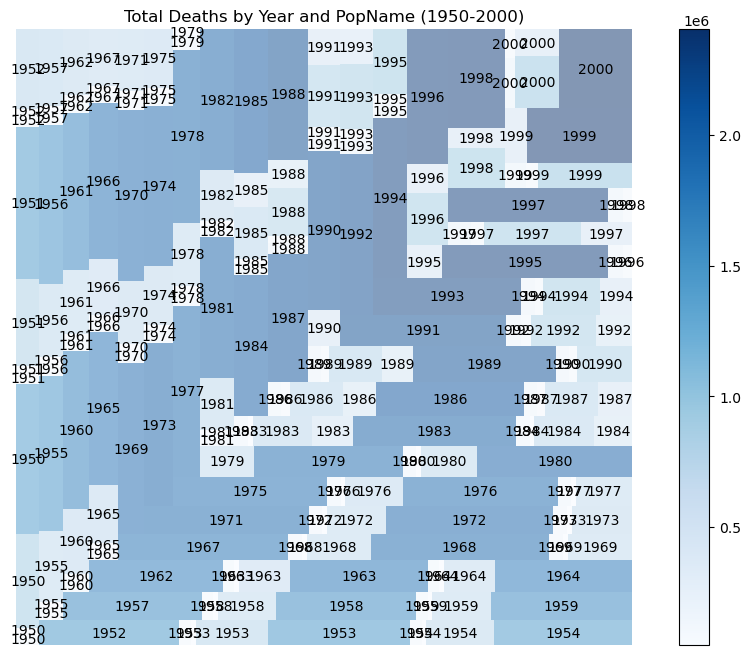

In [22]:
# 加载必要的库
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# 加载数据集
df = pd.read_csv('death_1950_2000.csv')

# 将死亡人数转换为整数
df['Deaths'] = df['Deaths'].astype(int)

# 设置颜色映射，以PopName分组
cmap = plt.cm.get_cmap('Blues')

# 按年份和PopName对数据进行分组，计算每年每个PopName的死亡总数
df_grouped = df.groupby(['Year', 'PopName']).agg({'Deaths': 'sum'}).reset_index()

# 对于每个PopName，创建一个矩形，并用颜色映射对其进行填充
norm = plt.Normalize(vmin=df_grouped['Deaths'].min(), vmax=df_grouped['Deaths'].max())
colors = [cmap(norm(value)) for value in df_grouped['Deaths']]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, aspect='equal')
ax = squarify.plot(sizes=df_grouped['Deaths'], label=df_grouped['Year'], color=colors, alpha=.5)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm)

# 去除边框
plt.axis('off')

# 添加标题
plt.title('Total Deaths by Year and PopName (1950-2000)')

# 展示图形
plt.show()


In [25]:
df 
unique_pop_names = df['PopName'].unique()
print("Unique PopNames:")
for pop_name in unique_pop_names:
    print(pop_name)

Unique PopNames:
CAN
CHE
JPN
KOR
USA


In [33]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import ipywidgets as widgets
from IPython.display import display

# 加载数据集
df = pd.read_csv('death_1950_2000.csv')

# 将死亡人数转换为整数
df['Deaths'] = df['Deaths'].astype(int)

# 按年龄分组：青年 (0-29)，中年 (30-59)，老年 (60+)
def age_group(age):
    if age < 30:
        return 'Youth'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Elderly'

df['AgeGroup'] = df['Age'].apply(age_group)

# 为不同国家分配主体颜色
country_colors = {
    'CAN': plt.cm.get_cmap('Blues'),
    'CHE': plt.cm.get_cmap('Purples'),
    'JPN': plt.cm.get_cmap('Reds'),
    'USA': plt.cm.get_cmap('Greens'),
}

def get_color_map(pop_name):
    return country_colors.get(pop_name)

def plot_tree(year):
    # 筛选指定年份的数据，并去除KOR的数据
    df_year = df[(df['Year'] == year) & (df['PopName'] != 'KOR')]

    # 对数据按国家 (PopName)、年龄组 (AgeGroup) 进行分组，计算每组的死亡总数
    df_grouped = df_year.groupby(['PopName', 'AgeGroup']).agg({'Deaths': 'sum'}).reset_index()

    # 生成颜色列表
    colors = [get_color_map(row['PopName'])(age_group_colors[row['AgeGroup']]) for _, row in df_grouped.iterrows()]

    # 创建图形和坐标轴
    fig, ax = plt.subplots(figsize=(12, 8))

    # 创建矩形树图
    squarify.plot(sizes=df_grouped['Deaths'], label=df_grouped['PopName'] + ' ' + df_grouped['AgeGroup'], color=colors, alpha=.5, ax=ax)

    # 去除边框
    plt.axis('off')

    # 添加标题
    plt.title(f'Total Deaths by PopName and Age Group in {year}')

    # 创建图例
    legend_elements = [Patch(facecolor=get_color_map(pop_name)(0.6), edgecolor='k', label=pop_name) for pop_name in country_colors.keys()]
    ax.legend(handles=legend_elements, title='Countries', loc='lower right')

    plt.show()

slider = widgets.IntSlider(min=1950, max=2000, step=1, value=1950)
interactive_plot = widgets.interactive(plot_tree, year=slider)
display(interactive_plot)


/var/folders/n1/dyw4m78j73l44cm8flftf7900000gn/T/ipykernel_20724/1690730589.py:9: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('death_1950_2000.csv')


interactive(children=(IntSlider(value=1950, description='year', max=2000, min=1950), Output()), _dom_classes=(…

NameError: name 'CHE' is not defined